In [51]:
import numpy as np
import scipy as sp

from numpy import append, array, diagonal, tril, triu
from numpy.linalg import inv
from scipy.linalg import lu
#from scipy.linalg import solve
from pprint import pprint
from numpy import array, zeros, diag, diagflat, dot

#from sympy import *
import sympy as sym
sym.init_printing()

import matplotlib as mpl
# matplotlib for ploting
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D     # 3d
# for inline interactive plotting
%matplotlib inline

#mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('png', 'pdf')
# for better picture quality
%config InlineBackend.figure_format = 'retina'
#https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

import seaborn as sns
sns.set()
#sns.set_style(style= "whitegrid")
#plt.style.available
# bold graph style
plt.style.use('fivethirtyeight')

# Nonlinear Equations

One of the most basic numerical operations encountered in computational economics
is to find the solution of a system of nonlinear equations. Nonlinear equations generally
arise in one of two forms. In the nonlinear *rootfinding problem*, a function f
mapping $R^n$ to $R^n$ is given and one must compute an n-vector $x$, called a *root* of $f$,
that satisfies

$$f(x) = 0$$


In the nonlinear fixed-point problem, a function $g$ from $R^n$ to $R^n$ is given and one
must compute an n-vector x called a fixed-point of $g$, that satisfies

$$x = g(x)$$


http://nbviewer.jupyter.org/github/sbustamante/ComputationalMethods/blob/master/material/one-variable-equations.ipynb

### Example: Cournot Duopoly



To illustrate the use of this function, consider a simple Cournot duopoly model, in which the inverse demand for a good is 	$P(q_{1},q_{2})=\left( \dfrac{1}{q_{1}+q_{2}} \right)^{\epsilon}$





In [5]:
# Example from the textbook
q = np.array([1, 1]) # initial point/guess quantity
c = np.array([0.6, 0.8]) # cost vector
eta = 1.6 # elasticity 
e = -1/eta


#### Formula on slide Econ_457_Lecture_14 page 17 

In [ ]:
fval = np.sum(q)**e + e * np.sum(q)**(e-1)*(q) - np.diag(c).dot(q) # function value


$e$ is the $-\epsilon$ and $q = q_1 + q_2$ in slide page 17 

it turns out the `fval` function is :

$$q^e + e* q^{e-1}*q_i - c_i *q_i=0$$

we need to put it in matrix form.

$$q^e \begin{bmatrix} 1 \\ 1 \end{bmatrix} + e* q^{e-1}* \begin{bmatrix} q_{1}  \\ q_{2}\end{bmatrix}- \begin{bmatrix} c_{1} & 0 \\ 0 & c_{2} \end{bmatrix} *\begin{bmatrix} q_{1}  \\ q_{2}\end{bmatrix}=0$$

#### [broadcasting](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html)

In [15]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Broadcasting allows these types of binary operations to be performed on arrays of different sizes–for example, we can just as easily add a scalar (think of it as a zero-dimensional array) to an array:

In [16]:
a + 5

array([5, 6, 7])

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png)

In [90]:
np.ones((3,3)) + a 

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [92]:
a[:, np.newaxis] 

array([[0],
       [1],
       [2]])

In [91]:
np.ones((3,3)) + a[:, np.newaxis] 

array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.]])

That is why `fval` function input includes scalar and vector, and the final output is a vector. Broadcasting works here.

In [18]:
fval = np.sum(q)**e + e * np.sum(q)**(e-1)*(q) - np.diag(c).dot(q) # function value


In [19]:
np.sum(q)**e

In [20]:
q

array([1, 1])

In [21]:
e * np.sum(q)**(e-1)*(q) 

array([-0.20263118, -0.20263118])

In [22]:
np.diag(c)

array([[0.6, 0. ],
       [0. , 0.8]])

In [23]:
np.diag(c).dot(q)

array([0.6, 0.8])

In [24]:
# first step result of objective value, and it should go to zero gradually
fval

array([-0.1542114, -0.3542114])

### Now let's look at `fjac` Jacobian function. Is it's output a vector or matrix function?

$e$ is the $-\epsilon$ and $q = q_1 + q_2$ in slide page 17- 20 

We need a jacobin for the fval function:
$$q^e + e* q^{e-1}*q_i - c_i *q_i=0$$

$$\begin{bmatrix} f_{11} & f_{12} \\ f_{21} & f_{22} \end{bmatrix}$$

we need to use chain rule to figure the $f_{i,j}$

$$f_{11} = e*q^{e-1} + e*q^{e-1} + (e-1)*e*q^{e-2}*q_i - c_i$$

$$f_{12} = e*q^{e-1} + (e-1)*e*q^{e-2}*q_i $$

put all $f_{i,j}$ into matrix form:


$$f_{jac} = e*q^{e-1}*\begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix} + e*q^{e-1} *\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} + (e-1)*e*q^{e-2}*\begin{bmatrix} q_1 & q_1 \\ q_2 & q_2\end{bmatrix} -  \begin{bmatrix} c_1 & 0 \\ 0 & c_2 \end{bmatrix}$$

### [Reshaping of Arrays](https://jakevdp.github.io/PythonDataScienceHandbook/02.02-the-basics-of-numpy-arrays.html)

Another useful type of operation is reshaping of arrays. The most flexible way of doing this is with the `reshape` method. 

Note that for this to work, the size of the initial array must match the size of the reshaped array. Where possible, the `reshape method` will use a no-copy view of the initial array, but with non-contiguous memory buffers this is not always the case.

Another common reshaping pattern is the conversion of a one-dimensional array into a two-dimensional row or column matrix. This can be done with the reshape method, or more easily done by making use of the `newaxis` keyword within a slice operation:

In [41]:
fjac = e*np.sum(q)**(e-1)*(np.ones([2,2]))+e*np.sum(q)**(e-1)*(np.eye(2))+\
(e-1)*e*np.sum(q)**(e-2)*(q[:, np.newaxis])-np.diag(c) # function jacbian

or `reshape()`

In [42]:
fjac = e*np.sum(q)**(e-1)*(np.ones([2,2]))+e*np.sum(q)**(e-1)*(np.eye(2))+\
(e-1)*e*np.sum(q)**(e-2)*(q.reshape((2,1)))-np.diag(c) # function jacbian

or force the dimestion to be matched using a way which is similar to textbook

In [48]:
fjac = e*np.sum(q)**(e-1)*(np.ones([2,2]))+e*np.sum(q)**(e-1)*(np.eye(2))+\
(e-1)*e*np.sum(q)**(e-2)*np.outer(q,np.ones((2,1)))-np.diag(c) # function jacbian

In [47]:
np.outer(q,np.ones((2,1)))

array([[0.82887821, 0.82887821],
       [0.67815161, 0.67815161]])

In [50]:
(q).dot(np.eye(2))

array([0.82887821, 0.67815161])

In [29]:
np.ones([2,2])

array([[1., 1.],
       [1., 1.]])

In [30]:
e*np.sum(q)**(e-1)*(np.ones([2,2]))

array([[-0.20263118, -0.20263118],
       [-0.20263118, -0.20263118]])

In [31]:
e*np.sum(q)**(e-1)*(np.eye(2))

array([[-0.20263118, -0.        ],
       [-0.        , -0.20263118]])

In [14]:
np.diag(c)

array([[0.6, 0. ],
       [0. , 0.8]])

In [43]:
# first step result of jacobian
fjac

array([[-0.95504247, -0.03409643],
       [-0.08625833, -1.20720437]])

When we write our own implemtations, we start from one update, to many updates in loop, and finally to functions. 

In [ ]:
# Cournot example. One update (first step) of newton algorithm 
q = q - np.linalg.inv(fjac).dot(fval) # newton update for the quantity
q

In [38]:
# Cournot example. Another update (second step) of newton algorithm 
fval = np.sum(q)**e + e * np.sum(q)**(e-1)*(q) - np.diag(c).dot(q) # function value
fjac = e*np.sum(q)**(e-1)*(np.ones([2,2]))+e*np.sum(q)**(e-1)*(np.eye(2))+\
(e-1)*e*np.sum(q)**(e-2)*(q[:, np.newaxis])-np.diag(c) # function jacbian
q = q - np.linalg.inv(fjac).dot(fval) # newton update for the quantity
q

array([0.82887821, 0.67815161])

array([-0.1542114, -0.3542114])

array([[-0.67598669,  0.12664449],
       [ 0.12664449, -0.87598669]])

Now consider a general Multi-firm model, with $I>1$ symmetric firms, and in which the inverse demand for a good is $P(q)=\left( \dfrac{1}{q} \right)^{\epsilon}$ and the aggregate quantity is $q=q_{1}+q_{2}+...+q_{I}=\sum_{i=1}^{I}q_{i}$

In [45]:
# Let's extend the example from the textbook to a many firms set-up
# This executes a finite numer of Newton iterations
maxit = 1000 # maximum number of iterations
tol = 10e-10 # tolerance level for convergence
eta = 1.6
e = -1/eta
#nfirm=2 #this allows us to select the number of firms (used to solve the system of foc's)
nfirm=5 #increased competition
#nfirm=1000 #close to perfect competition

#Initializations of the vectors of quantities and costs: we use lists and later convert them to arrays
qlist = []
clist = []

#These alternative initializations don't work necessarily
#qmf=np.array([])
#cmf=np.array([])
#qmf = ones(nfirm)

#Let's assign the desired initial guesses and vector of costs
for it in np.arange(nfirm):
    qlist.append(1.0)
    clist.append(0.7)

#Create a vector of ones and convert the lists to arrays for matematical manipulation
vecone=np.array(qlist)
qmf=np.array(qlist)
qmf=qmf*0.2
cmf=np.array(clist)
    
print('q1:',qmf[0])
#print('q2:',qmf[1])
print('c1:',cmf[0])
#print('c2:',cmf[1])

it=0

for it in np.arange(maxit):

    fvalmf = np.sum(qmf)**e + e * np.sum(qmf)**(e-1)*(qmf) - np.diag(cmf).dot(qmf)
    fjacmf = e*np.sum(qmf)**(e-1)*(np.ones([nfirm,nfirm]))+e*np.sum(qmf)**(e-1)*(np.eye(nfirm))+\
    (e-1)*e*np.sum(qmf)**(e-2)*(qmf[:, np.newaxis])-np.diag(cmf)
    #(e-1)*e*np.sum(qmf)**(e-2)*(qmf).dot(vecone)-np.diag(cmf)
    qmf = qmf - np.linalg.inv(fjacmf).dot(fvalmf)
    if np.linalg.norm(fvalmf)<tol:
        break
        
print('The final iteration is:',it)
print('The foc value is f:',fvalmf)
print('The computed quantity is q:',qmf)

#Final computations
pmf=np.sum(qmf)**e #price
pimf=pmf*qmf[0]-cmf[0]*qmf[0]**2 #profits

print('The price is p:',pmf)
print('The total profits are pi:',pimf*nfirm)
print('The market size is:',np.sum(qmf))

q1: 0.2
c1: 0.7
The final iteration is: 5
The foc value is f: [1.07691633e-14 1.07691633e-14 1.07691633e-14 1.07691633e-14
 1.07691633e-14]
The computed quantity is q: [0.61773515 0.61773515 0.61773515 0.61773515 0.61773515]
The price is p: 0.49418812002404333
The total profits are pi: 0.1907983577913272
The market size is: 3.08867575015027


In [34]:
(qmf.dot(np.ones([nfirm,1])))

array([nan])

In [35]:
qmf

array([nan, nan, nan, nan, nan])

If the matrix form is too much, we can do in scalar form as well.

<span style="color:red">It is your turn to turn it into a function</span>
### A Numerical Example with a Vector-valued Function
#### Formula on slide Econ_457_Lecture_14 page 14 

In [4]:
# Example from the slide
# This executes a finite numer of Newton iterations
maxit = 1000 # maximum number of iterations
tol = 10e-10 # tolerance level for convergence


def nlfun(x):
    f1 = < your code  >
    f2 = < your code  >
    return np.array([f1,f2])

def nljac(x):
    j11 = < your code  >
    j12 = < your code  >
    j21 = < your code  >
    j22 = < your code  >
    return np.array([[j11,j12],
                    [j21,j22]])

x = np.array([1.5,1.5])
for it in np.arange(maxit):

    fval = nlfun(x)
    fjac = nljac(x)
    x = x - np.linalg.inv(fjac).dot(fval)
    if np.linalg.norm(fval)<tol:
        break
        
print('The final iteration is:',it)
print('The computed root is q:',x)
print('The function value is f:',fval) # it should be close to zero when a root is found

The final iteration is: 6
The computed root is q: [0.69314718 0.83255461]
The function value is f: [ 3.88689081e-12 -5.94535532e-12]


my solution

In [ ]:
# Example from the slide
# This executes a finite numer of Newton iterations
maxit = 1000 # maximum number of iterations
tol = 10e-10 # tolerance level for convergence


def nlfun(x):
    f1 = np.exp(x[0])*x[1] -2*x[1]
    f2 = (x[0]*x[1]- x[1]**3)
    return np.array([f1,f2])

def nljac(x):
    j11 = x[1]*np.exp(x[0])
    j12 = np.exp(x[0])-2
    j21 = x[1]
    j22 = x[0] -3*x[1]**2
    return np.array([[j11,j12],
                    [j21,j22]])

x = np.array([1.5,1.5])
for it in np.arange(maxit):

    fval = nlfun(x)
    fjac = nljac(x)
    x = x - np.linalg.inv(fjac).dot(fval)
    if np.linalg.norm(fval)<tol:
        break
        
print('The final iteration is:',it)
print('The computed root is q:',x)
print('The function value is f:',fval) # it should be close to zero when a root is found

###  How to get Jacobian matrix

If the derivative is too hard to figure out, `sympy` may help in small dimention problem.

Let's use the example from slide page 14

In [69]:
x = x1, x2 = sym.symbols("x1, x2")

In [70]:
x

In [71]:
sym.diff(x2*sym.exp(x1)-2*x2,x1)

In [72]:
sym.diff(x2*sym.exp(x1)-2*x2,x2)

In [73]:
sym.diff( x1*x2-x2**3,x2)

In [74]:
sym.diff( x1*x2-x2**3,x1)

Or we can do it in matrix form

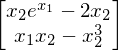

In [75]:
F = sym.Matrix([x2*sym.exp(x1)-2*x2, x1*x2-x2**3 ])
F

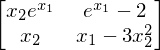

In [76]:
F.jacobian(x)

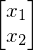

In [77]:
X = sym.Matrix(x)
X

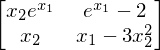

In [68]:
F.jacobian(X)

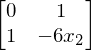

In [80]:
sym.hessian(x1*x2-x2**3,X)

## jupyter-widgets-tutorial

[Interact](http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html)

[Notebook](https://github.com/mwcraig/scipy2017-jupyter-widgets-tutorial/tree/master/notebooks)

[Video](https://www.youtube.com/watch?time_continue=5&v=eWzY2nGfkXk)

Jupyter widgets are powerful tools for building user interfaces with graphical controls such as sliders and text boxes inside a Jupyter notebook. Interactive widgets can also be rendered in Sphinx documentation, nbviewer, and static web pages. Jupyter widgets are more than a collection of controls, they also are a framework that makes it easy to build custom GUI controls. Examples of custom widget packages include libraries for interactive 2-D charting (bqplot), 3-D graphics (pythreejs, ipyvolume), mapping (ipyleaflet), and more.

In [95]:
from ipywidgets import *
from traitlets import dlink

In [96]:
def f(x):
    print(x * x)

In [97]:
interact(f, x=(0, 100));

interactive(children=(IntSlider(value=50, description='x'), Output()), _dom_classes=('widget-interact',))

In [98]:
slider = FloatSlider(
    value=7.5,
    min=5.0,
    max=10.0,
    step=0.1,
    description='Input:',
)

slider

FloatSlider(value=7.5, description='Input:', max=10.0, min=5.0)

In [102]:
slider.value

In [101]:

text = FloatText(description='Value')
dlink((slider, 'value'), (text, 'value'))
text

FloatText(value=8.2, description='Value')

### Using Interact


In [104]:

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [105]:
def f(x):
    return 3 * x


In [106]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-interact',))

In [107]:
interact(f, x=True);

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

In [108]:
interact(f, x='Hi there!');

interactive(children=(Text(value='Hi there!', description='x'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, min=-1.0), Output()), _dom_classes=('widget-interact',))

#### Fixing arguments using fixed
There are times when you may want to explore a function using interact, but fix one or more of its arguments to specific values. This can be accomplished by wrapping values with the fixed function.

In [110]:

def h(p, q):
    return (p, q)

In [111]:

interact(h, p=5, q=fixed(20));

interactive(children=(IntSlider(value=5, description='p', max=15, min=-5), Output()), _dom_classes=('widget-interact',))

In [88]:
def ISLM(Yguess=534, new_G_bar = 200, new_T_bar = 110, new_M_bar = 180.00,newTitle =r'Expansion of money supply ($\bar M$ increases by 20%)'):
    """ A function plotting changes in the IS-LM Model
    # parameters 
    c = 0.63  # marginal propensity to consume 

    b = 1500 #sensitivity of the investment to the interest rate 

    k = 0.6  #sensitivity of the money demand to income 

    h = 2700 #sensitivity of the money demand to the interest rate

    """
    import pprint
    import scipy
    import scipy.linalg   # SciPy Linear Algebra Library
    import matplotlib.pyplot as plt

    %matplotlib notebook
    
    
    # parameters 
    c = 0.63 #marginal propensity to consume 

    b = 1500 #sensitivity of the investment to the interest rate 

    k = 0.6  #sensitivity of the money demand to income 

    h = 2700 #sensitivity of the money demand to the interest rate
    
    
    # policy exogenous variables 
    C_bar = 55 # autonomous consumption 

    I_bar = 75 # autonomous investment 

    G_bar = 200 #government spending 

    T_bar = 110 # tax on income 

    M_bar = 200 # money supply 

    P_bar = 1 #price level ( fixed in the short−run )
    
    A = np.matrix([ [1, -1, -1, 0], # Y=C+I+G 
     [-c, 1, 0, 0], # C=C_bar+c(Y−T) 
     [0, 0, 1, b], # I=I_bar−br 
     [k, 0, 0, -h] ]) # M/P=kY−hr
    
    d = np.array([ G_bar , C_bar - c*T_bar , I_bar , M_bar/P_bar ] )
    
        # compute the endogenous variables 
    P, L ,U = scipy.linalg.lu(A) # LU factorization 

    x = scipy.linalg.inv(U)@(scipy.linalg.inv(P@L)@ d) # solution of the linear system

    print(" IS-LM model: closed economy \
           \nexogenous variables: \nG = {}; T = {}; M = {}; P = {} ".format(G_bar,T_bar, M_bar, P_bar),
          "\n-----------------------------------------------------------\
          \nproduct, Y = {0:.2f}，\
          \nconsumption, C = {1:.2f}, \
          \ninvestment, I = {2:.2f}，\
          \ninterest rate (%), r = {3:.2f}".format(x[0],x[1],x[2],x[3]*100  ))
    
    # plot the solution : IS−LM diagram

    # generate a grid on Y; 
    # in this case, since this is a line, only 2 points would have been enough

    Y = np.linspace(0.95*x[0],1.05*x[0], num=100) 

    # IS : I=Y−C−G and I=I_bar−br expressed in terms of r

    C = C_bar+c*(Y-T_bar ) 

    I =Y-C-G_bar 

    IS=( I_bar-I ) / b  

    # LM: M_bar/P_bar=kY−hR expressed in terms of r

    LM = 1/h*( k*Y-M_bar / P_bar ) 
    
    # policy shock
    G_bar = new_G_bar #government spending 
    T_bar = new_T_bar # tax on income 
    M_bar = new_M_bar # money supply 

    # x = [Y,C,I,r] , vector of the endogeneous variables 
    # d, vector of the exogeneous variables 

    d = np.array([ G_bar , C_bar - c*T_bar , I_bar , M_bar/P_bar ] )
    
    
    # compute the endogenous variables 
    P, L ,U = scipy.linalg.lu(A) # LU factorization 

    new_x = scipy.linalg.inv(U)@(scipy.linalg.inv(P@L)@ d) # solution of the linear system

    print("\n New IS-LM model: closed economy \
          \nshock: \nexogenous variables: \nG = {}; T = {}; M = {}; P = {} ".format(G_bar,T_bar, M_bar, P_bar),
          
          "\n-----------------------------------------------------------\
          \nproduct, Y = {0:.2f}，\
          \nconsumption, C = {1:.2f}, \
          \ninvestment, I = {2:.2f}，\
          \ninterest rate (%), r = {3:.2f}".format(new_x[0],new_x[1],new_x[2],new_x[3]*100  ))
    
    # plot the solution : IS−LM diagram

    # generate a grid on Y; in this case, since this is a line, only 2 points would have been enough

    new_Y = np.linspace(0.95*new_x[0],1.05*new_x[0], num=100) 

    # IS : I=Y−C−G and I=I_bar−br expressed in terms of r

    new_C = C_bar+c*(new_Y-T_bar ) 

    new_I =new_Y-new_C-G_bar 

    new_IS=( I_bar-new_I ) / b  

    # LM: M_bar/P_bar=kY−hr expressed in terms of r

    new_LM = 1/h*( k*new_Y-M_bar / P_bar ) 

    fig, ax = plt.subplots(figsize=(8,8));
    ax.spines['right'].set_visible(False);
    ax.spines['top'].set_visible(False);
    ax.grid();
    ax.plot(Y, IS , '--b', label='IS line');
    ax.plot(Y, LM,  color='red', linewidth=2.0, linestyle='-', label='LM line');
    ax.plot(new_Y, new_IS , '--b', linewidth=4.0, label='new IS line');
    ax.plot(new_Y, new_LM,  color='red', linewidth=4.0, linestyle='-', label='new LM line');
    ax.set_xlabel(r'$y$', fontsize=16);
    ax.set_ylabel(r'$r$', fontsize=16);
    #plt.xlim((500, 560)) too much, let python to choose the limits
    #plt.ylim((0.036, 0.054))
    plt.title(newTitle);
    plt.legend();
    
    
    
    

 IS-LM model: closed economy            
exogenous variables: 
G = 200; T = 110; M = 200; P = 1  
-----------------------------------------------------------          
product, Y = 528.64，          
consumption, C = 318.74,           
investment, I = 9.90，          
interest rate (%), r = 4.34

 New IS-LM model: closed economy           
shock: 
exogenous variables: 
G = 200; T = 110; M = 220.0; P = 1  
-----------------------------------------------------------          
product, Y = 544.44，          
consumption, C = 328.70,           
investment, I = 15.74，          
interest rate (%), r = 3.95


<IPython.core.display.Javascript object>


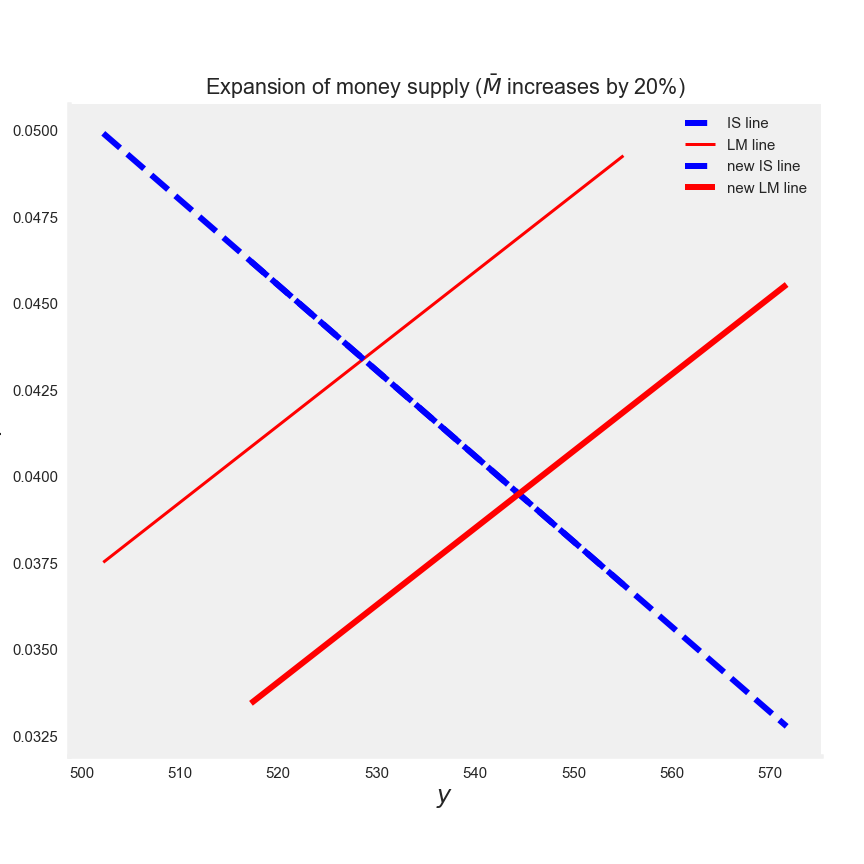

In [83]:
ISLM(new_G_bar = 200, new_T_bar = 110, new_M_bar = 220.00, 
     newTitle= r'Expansion of money supply ($\bar M$ increases by 20%)')

In [84]:
from ipywidgets import interact, fixed

In [85]:
new_G_bar = 200
new_T_bar = 110
new_M_bar = 200


Gmin, Gmax = 180, 220
Tmin, Tmax = 100, 120
Mmin, Mmax = 180,220

In [86]:
def ISLM_interact_plot(new_G_bar = new_G_bar, new_T_bar = new_T_bar, new_M_bar = new_M_bar):
    ISLM(new_G_bar = new_G_bar, new_T_bar = new_T_bar, new_M_bar = new_M_bar, 
     newTitle= r'The Impact of Policy Shock on IS-LM Model')

In [87]:
interact(ISLM_interact_plot,
         new_G_bar=(Gmin,Gmax,1),
         new_T_bar=(Tmin,Tmax,1), 
         new_M_bar=(Mmin,Mmax,1)
        );

interactive(children=(IntSlider(value=200, description='new_G_bar', max=220, min=180), IntSlider(value=110, description='new_T_bar', max=120, min=100), IntSlider(value=200, description='new_M_bar', max=220, min=180), Output()), _dom_classes=('widget-interact',))

### Fixing arguments using `fixed` 

In [89]:
interact(ISLM,
         new_G_bar=(Gmin,Gmax,1),
         new_T_bar=(Tmin,Tmax,1), 
         new_M_bar=(Mmin,Mmax,1),
         Yguess=fixed(534),
         newTitle= fixed(r'The Impact of Policy Shock on IS-LM Model')
        );

interactive(children=(IntSlider(value=200, description='new_G_bar', max=220, min=180), IntSlider(value=110, description='new_T_bar', max=120, min=100), IntSlider(value=180, description='new_M_bar', max=220, min=180), Output()), _dom_classes=('widget-interact',))

###  <span style="color:red">It is your turn to turn it into a function</span>

###  <span style="color:red">It is your turn to turn it into a function</span>

### Check with Scipy

###  <span style="color:red">It is your turn to turn it into a function</span>

### Check with Scipy

In [1]:
from IPython.core.display import HTML, Image
css_file = '../../custom.css'
HTML(open(css_file, 'r').read())

In [94]:
import pandas as pd
df = pd.read_csv(
    'https://gist.githubusercontent.com/chriddyp/' +
    '5d1ea79569ed194d432e56108a04d188/raw/' +
    'a9f9e8076b837d541398e999dcbac2b2826a81f8/'+
    'gdp-life-exp-2007.csv')